# Aula 5 - Pandas II



## 5.1 Agregação

### 5.1.1. Groupby

Muitas vezes queremos agregar determinados dados de um DataFrame. Considere a imagem abaixo:
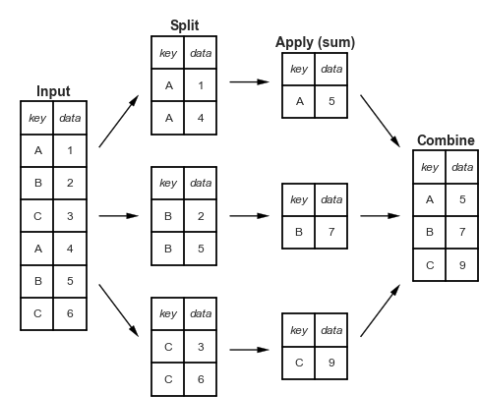

Neste caso, poderiamos querer somar todos os valores referentes a letra A, a letra B, e assim por diante. Para isso usamos o método `groupby()`, que toma como argumento a coluna que desejamos agrupar, e em seguida aplicamos o operador desejado nos valores agrupados, por exemplo `.sum()`.

Considere o conjunto de dados `business.retailsales.csv`, com a relação de produtos vendidos em um pequeno negócio. 

In [1]:
import pandas as pd
dt = pd.read_csv("../Datasets/business.retailsales.csv", sep = ",")
dt

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


Na coluna `Product Type` temos o tipo de produto e na `Gross Sales` as vendas. Poderiamos usar o `groupby` para analisar as vendas somadas de todos os produtos (veja que existem muitas linhas com a venda de um mesmo produto). A função groupby retorna um novo dataframe.

In [2]:
dt_agregado = dt.groupby("Product Type").sum()
dt_agregado

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
Product Type,,,,,
Accessories,84,3892.40,-107.02,0.00,3785.38
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85
Basket,1461,143815.50,-4584.42,-4439.69,134791.39
Christmas,575,15476.00,-345.19,-670.00,14460.81
Easter,1,38.00,-3.80,0.00,34.20
Fair Trade Gifts,110,2258.00,-53.33,0.00,2204.67
Furniture,27,2034.00,-169.04,0.00,1864.96
Gift Baskets,1,19.50,0.00,0.00,19.50
Home Decor,404,27114.55,-991.21,-423.35,25699.99


Dessa forma fica rápido analisar qual produto teve mais vendas no período. Se alterarmos `.sum()` por `.mean()` obtemos não a soma, mas sim a média dos valores:

In [3]:
dt_agregado_media = dt.groupby("Product Type").mean()
dt_agregado_media

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
Product Type,,,,,
Accessories,2.153846,99.805128,-2.744103,0.000000,97.061026
Art & Sculpture,4.234421,268.001780,-8.770979,-8.545786,250.685015
Basket,2.651543,261.008167,-8.320181,-8.057514,244.630472
Christmas,7.876712,212.000000,-4.728630,-9.178082,198.093288
Easter,1.000000,38.000000,-3.800000,0.000000,34.200000
Fair Trade Gifts,3.928571,80.642857,-1.904643,0.000000,78.738214
Furniture,1.687500,127.125000,-10.565000,0.000000,116.560000
Gift Baskets,1.000000,19.500000,0.000000,0.000000,19.500000
Home Decor,3.083969,206.981298,-7.566489,-3.231679,196.183130


### 5.1.2 Apply
O método `apply` é o contraponto genérico de `groupby`. Vimos que o `groupby` funciona sempre com alguma medida que deve ser apresentada e aplicado ao conjnto agrupado, como `sum()` ou `count()`. Porém, e se quisermos aplicar alguma operação nos dados agrupados que não está disponível por padrão no dataframe? É para isso que serve o `apply`.

Nesse caso nós devemos definir uma função que realiza a operação que queremos aplicar aos dados agrupados, sendo que passamos essa função como argumento do apply. A função deve (necessáriamente) ter um argumento que é um DataFrame, e deve retornar o que desejamos fazer com os grupos. Considere o banco de dados de vendas, se olharmos somente o produto "Basket":

In [20]:
dt[dt["Product Type"] == "Basket"]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
5,Basket,17,2695.0,-52.50,-110.0,2532.50
6,Basket,20,2310.0,-66.00,-110.0,2134.00
...,...,...,...,...,...,...
1763,Basket,0,34.0,0.00,-34.0,0.00
1764,Basket,0,48.0,0.00,-48.0,0.00
1766,Basket,0,195.0,0.00,-195.0,0.00
1767,Basket,0,28.0,0.00,-28.0,0.00


Peercebe-se que os dados da coluna *Net Quantity* não estão ordenados. Por alguma razão precisamos ordenar, dentro de cada grupo, os dados pelas quantidades de Net Quantity. Para isso podemos criar uma função que faz essa ordenação, e passar ela como parâmetro do apply. Isso é feito no código a seguir:

In [23]:
# Função para ordenar os dados, df é o dataframe
def top(df):
    return df.sort_values(by="Net Quantity")    

# Usamos o groupby com o apply passando a função 'top' como argumento
dt_apply = dt.groupby("Product Type").apply(top)
dt_apply

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
Product Type                                                                    
Accessories  1103  Accessories             1         68.0        0.0      0.0   
             1173  Accessories             1         58.0        0.0      0.0   
             1181  Accessories             1         58.0        0.0      0.0   
             1184  Accessories             1         58.0        0.0      0.0   
             1273  Accessories             1         48.0        0.0      0.0   
...                        ...           ...          ...        ...      ...   
Textiles     971      Textiles             3         84.0        0.0      0.0   
             978      Textiles             4         88.0       -4.4      0.0   
             124      Textiles             5        564.0      -44.0      0.0   
             256      Textiles             8        342.0      -15.2    -38.0   
             539      Textiles             8        164.0        0.0      0.0   

                   Total Net Sales  
Product Type                        
Accessories  1103             68.0  
             1173             58.0  
             1181             58.0  
             1184             58.0  
             1273             48.0  
...                            ...  
Textiles     971              84.0  
             978              83.6  
             124             520.0  
             256             288.8  
             539             164.0  

[1767 rows x 6 columns]

Vamos observar no novo DataFrame novamente como estão os dados do produto "Basket":

In [25]:
dt_apply[ dt_apply["Product Type"] == "Basket"]

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
Product Type                                                                    
Basket       1772       Basket             0        116.0     -23.20    -92.8   
             1763       Basket             0         34.0       0.00    -34.0   
             1767       Basket             0         28.0       0.00    -28.0   
             1766       Basket             0        195.0       0.00   -195.0   
             1764       Basket             0         48.0       0.00    -48.0   
...                        ...           ...          ...        ...      ...   
             3          Basket            17       3035.0     -63.25      0.0   
             120        Basket            19        622.0     -94.60      0.0   
             16         Basket            20       1560.0     -47.80      0.0   
             6          Basket            20       2310.0     -66.00   -110.0   
             10         Basket            30       1907.0     -41.30      0.0   

                   Total Net Sales  
Product Type                        
Basket       1772             0.00  
             1763             0.00  
             1767             0.00  
             1766             0.00  
             1764             0.00  
...                            ...  
             3             2971.75  
             120            527.40  
             16            1512.20  
             6             2134.00  
             10            1865.70  

[551 rows x 6 columns]

Percebe-se que agora os dados estão ordenados de acordo com "Net Quantity".

## 5.2 Dados únicos
Muitas vezes temos um conjunto de dados (de uma coluna, por exemplo), contendo repetições, e queremos acessar somente dados únicos. Para isso podemos usar a função `unique()`. Considere o banco de dados de venda de produtos *business.retailsales.csv*. As linhas possuem o nome dos produtos vendidos, sendo que pode haver repetições:

In [4]:
dt["Product Type"] # Note que existem 1775 linhas

0       Art & Sculpture
1                Basket
2                Basket
3                Basket
4       Art & Sculpture
             ...       
1770            Kitchen
1771            Jewelry
1772             Basket
1773            Kitchen
1774            Kitchen
Name: Product Type, Length: 1775, dtype: object

In [5]:
# Acessando somente os itens SEM REPETIÇÃO:
dt["Product Type"].unique()

array(['Art & Sculpture', 'Basket', 'Christmas', 'Home Decor',
       'Recycled Art', 'Jewelry', 'Skin Care', 'Kitchen', 'Textiles',
       'Accessories', 'Fair Trade Gifts', 'One-of-a-Kind', 'Soapstone',
       'Music', 'Furniture', 'Kids', nan, 'Easter', 'Gift Baskets'],
      dtype=object)

## 5.3 Dados nulos
Muitas vezes um conjunto de dados possui dados faltantes (ou dados nulos). No pandas esses valores são representados como `NaN`(Not a Number), e podem ser facilmente detectados. Usando a função `.isnull()` em um DataFrame, temos um DataFrame de booleanos valores True se ali existe um `NaN`. Considere o conjunto de dados `Titanic-train.csv`. O conjunto contém informações sobre os mortos/sobreviventes do Titanic.

In [6]:
dt_tit = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\Python\Datasets\Titanic-train.csv", sep=",")
dt_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


A coluna `cabin` mostra a cabine em que o passageiro estava hospedado (pobre Jack...). Por algum motivo, nem todos os dados estão preenchidos. Podemos usar a função `.isnull()` para confirmar:

In [7]:
dt_tit.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Para alguma análise, podemos estar interessados somente nos dados com todos os valores preenchidos. Para isso podemos usar a função `.dropna()`, que remove do conjunto de dados toda linha que contenha pelo menos um valor NaN:

In [8]:
dt_tit_completo = dt_tit.dropna()
dt_tit_completo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Uma outra abordagem poderia ser substituir valores NaN por algum valor padrão. Para isso podemos usar a função `fillna()` com o valor a ser preenchido. Vamos substituir todos os dados faltantes por uma string "INEXISTENTE".

In [9]:
dt_tit_filtro = dt_tit.fillna("INEXISTENTE")
dt_tit_filtro

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,INEXISTENTE,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,INEXISTENTE,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,INEXISTENTE,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,INEXISTENTE,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,INEXISTENTE,1,2,W./C. 6607,23.4500,INEXISTENTE,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Para substituirmos dados de colunas específicas podemos passar um dicionário como parâmetro, com as chaves sendo as colunas e os valores o conteúdo para substituição. O código abaixo substitui somente os dados da coluna cabine, com uma cabine "DUMMY" chamada "Z999":

In [10]:
dt_tit_dummy = dt_tit.fillna({"Cabin":"Z999"})
dt_tit_dummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z999,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z999,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z999,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Z999,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Z999,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 5.4 Amostragem

In [11]:
import pandas as pd
df = pd.read_csv("../Datasets/us-election-2012-results-by-county.csv", sep = ",")

# Agregando por candidatos e somando 
df_somado = df.groupby("FirstName").sum()

# Coletando os votos totais
votos_totais = df_somado["Votes"].sum()

# Calculando a proporção de votos para cada candidato
l_proporcoes = (df_somado["Votes"]/votos_totais) * 100
l_proporcoes

FirstName
Andre        0.000665
Barack      50.586601
Barbara      0.000787
Chuck        0.003846
Dean         0.000898
Gary         0.977633
Gloria       0.001235
Jack         0.000421
James        0.003095
Jeff         0.000736
Jerry        0.001889
Jill         0.349281
Jim          0.002576
Merlin       0.002300
Mitt        47.832220
Peta         0.006129
Randall      0.010544
Richard      0.009864
Rocky        0.031316
Roseanne     0.044145
Sheila       0.002033
Stewart      0.003204
Thomas       0.024742
Tom          0.004581
Virgil       0.095789
Will         0.003467
Name: Votes, dtype: float64

### 5.4.1 Amostragem aleatória

DataFrame.iloc[[index1,index2,...]]: seleciona as linhas com indices index1, index2, ...

In [12]:
import random

# Gerando uma lista de 300 indices aleatórios, entre 0 e o tamanho de elementos do df
indices_selecionados = random.sample(range(0,len(df)), 300)
indices_selecionados

# Seleciona as linhas referentes aos indices
df_amostragem = df.iloc[indices_selecionados]

# Calcula a nova proporção
df_amostragem_somado = df_amostragem.groupby("FirstName").sum()
soma_amostrado       = df_amostragem_somado["Votes"].sum()
soma_amostrado
l_proporcoes_amostrado = (df_amostragem_somado["Votes"]/soma_amostrado) * 100
l_proporcoes_amostrado

# Comparando os dois:
print(l_proporcoes)
print(l_proporcoes_amostrado)
diferenca = abs(l_proporcoes - l_proporcoes_amostrado)
print(diferenca)


FirstName
Andre        0.000665
Barack      50.586601
Barbara      0.000787
Chuck        0.003846
Dean         0.000898
Gary         0.977633
Gloria       0.001235
Jack         0.000421
James        0.003095
Jeff         0.000736
Jerry        0.001889
Jill         0.349281
Jim          0.002576
Merlin       0.002300
Mitt        47.832220
Peta         0.006129
Randall      0.010544
Richard      0.009864
Rocky        0.031316
Roseanne     0.044145
Sheila       0.002033
Stewart      0.003204
Thomas       0.024742
Tom          0.004581
Virgil       0.095789
Will         0.003467
Name: Votes, dtype: float64
FirstName
Barack      69.393804
Barbara      0.001228
Dean         0.001445
Gary         1.461459
Gloria       0.001084
Jack         0.000144
James        0.000361
Jerry        0.002528
Jill         0.350484
Merlin       0.004117
Mitt        28.393926
Peta         0.010546
Randall      0.005490
Richard      0.007151
Rocky        0.017914
Roseanne     0.215766
Sheila       0.000217
Stewar

### 5.4.2 Amostragem estratificada

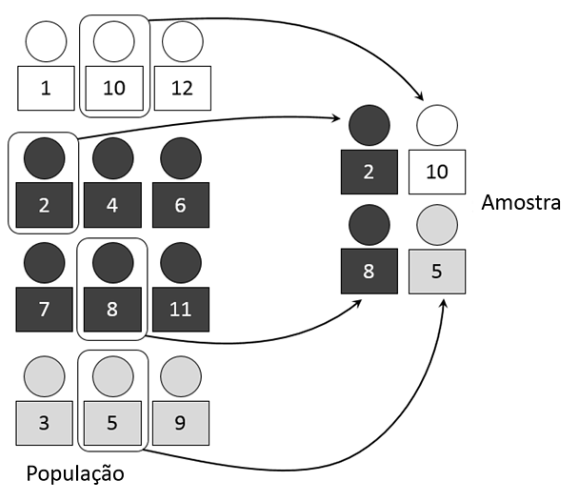